# Exercise 4 - Hodgkin & Huxley Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib import rcParams
% matplotlib inline

rcParams.update({'font.size': 21})

## Equations

### Constants

In [62]:
C_m = 1 #membrane capacitance, in uF/cm^2

g_Na = 120.0 #maximum conducances, in mS/cm^2
g_K  = 36.0
g_L  = 0.3

V_Na = 115 #Nernst reversal potentials, in mV
V_K  = -12
V_L  = 10.6
V_rest = -70


### Rate equations V in mV:
non-linear paramiters alfa and beta

In [3]:
def alpha_m(u): return (2.5 - 0.1 * u) / (np.exp(2.5 - 0.1 * u) - 1)
def alpha_n(u): return (0.1 - 0.01 * u) / (np.exp(1 - 0.1 * u ) - 1)
def alpha_h(u): return (0.07 * np.exp(-u / 20))

def beta_m(u):  return 4 * np.exp((-u) / 18)
def beta_n(u):  return 0.125 * np.exp((-u) / 80)
def beta_h(u):  return 1 / (np.exp(3 - 0.1 * u) + 1)

### Temperature correction

In [25]:
def temp_corr(T): return 3**(0.1*(T-6.3))  

## Time Constants and Steady State Values

### Time constants
τx(u)=[αx(u)+βx(u)] ^ −1

In [56]:
def tau_m(u): return (alpha_m(u) + beta_m(u))**(-1)
def tau_n(u): return (alpha_n(u) + beta_n(u))**(-1)
def tau_h(u): return (alpha_h(u) + beta_h(u))**(-1)

### Calculate time constants, for two temperature conditions

In [57]:
V = np.linspace(-100, 100, 1000)
temp1 = temp_corr(6.3)
Tau_M_6 = tau_m(V) / temp1
Tau_N_6 = tau_n(V) / temp1
Tau_H_6 = tau_h(V) / temp1

temp2 = temp_corr(28)
Tau_M_28 = tau_m(V) / temp2
Tau_N_28 = tau_n(V) / temp2
Tau_H_28 = tau_h(V) / temp2


### Plot time constans for two temp

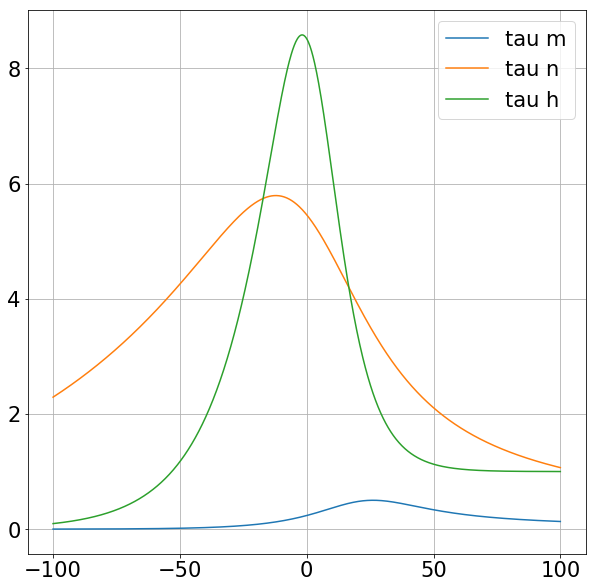

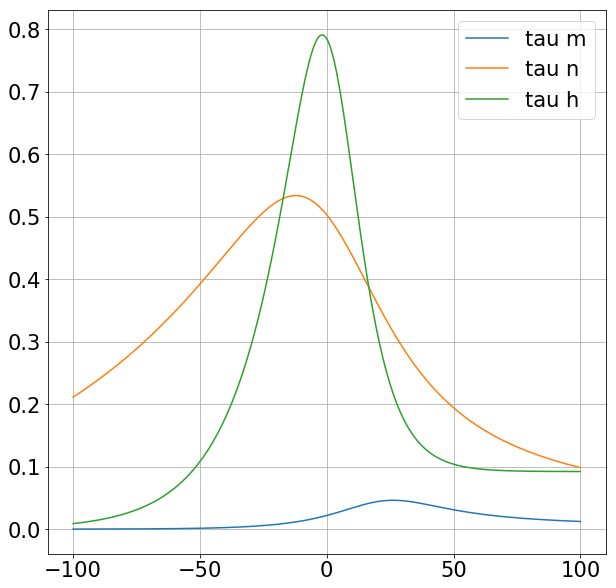

In [58]:
fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt0, = plt.plot(V, Tau_M_6, label='tau m');
plt1, = plt.plot(V, Tau_N_6, label='tau n');
plt2, = plt.plot(V, Tau_H_6, label='tau h');
plt.legend(loc=1, handles=[plt0, plt1, plt2])

fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt10, = plt.plot(V, Tau_M_28, label='tau m');
plt11, = plt.plot(V, Tau_N_28, label='tau n');
plt12, = plt.plot(V, Tau_H_28, label='tau h');
plt.legend(loc=1, handles=[plt10, plt11, plt12])

In [43]:
def m_ss(u): return alpha_m(u) / (alpha_m(u) + beta_m(u))
def n_ss(u): return alpha_n(u) / (alpha_n(u) + beta_n(u))
def h_ss(u): return alpha_h(u) / (alpha_h(u) + beta_h(u))

In [53]:
V = np.linspace(-100, 100, 1000)
M_6 = tau_m(V) / temp1
N_6 = tau_n(V) / temp1
H_6 = tau_h(V) / temp1

M_28 = tau_m(V) / temp2
N_28 = tau_n(V) / temp2
H_28 = tau_h(V) / temp2

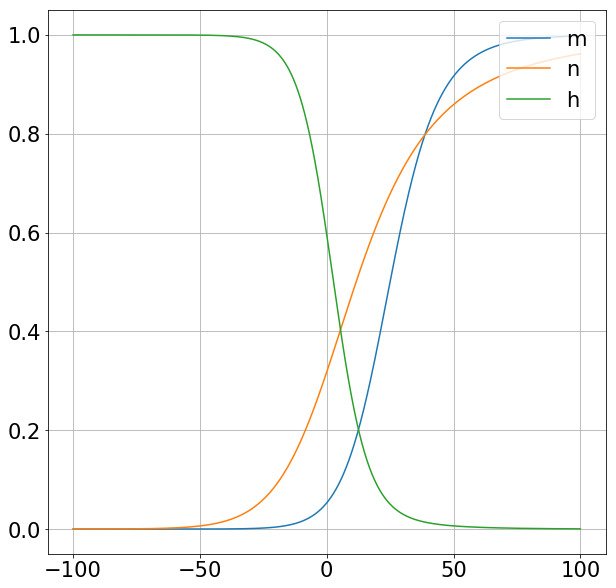

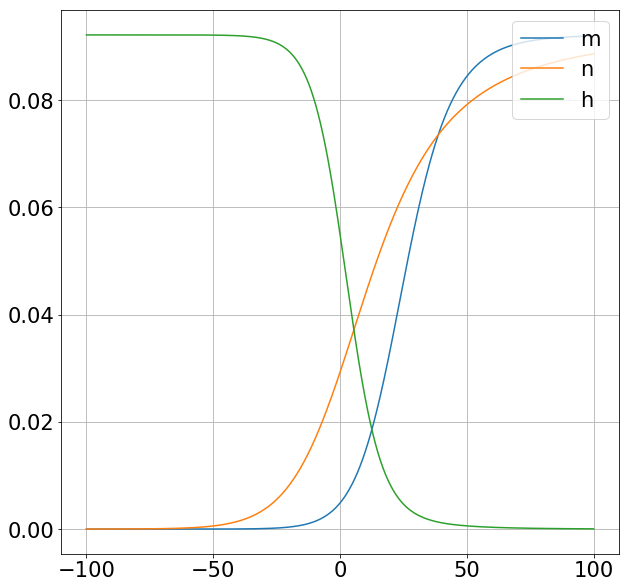

In [59]:
fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt0, = plt.plot(V, M_6, label='m');
plt1, = plt.plot(V, N_6, label='n');
plt2, = plt.plot(V, H_6, label='h');
plt.legend(loc=1, handles=[plt0, plt1, plt2])

fig, ax = plt.subplots(figsize=(10, 10));
# ax.set_ylabel('V (V)')
# ax.set_xlabel('t (s)')
ax.grid()
# ax.set_xlim(0, 50)
# ax.set_ylim(-60, 20)
# plt.yticks(np.arange(-5, 6, 1));
# plt.xticks(np.arange(-5, 6, 1));
plt0, = plt.plot(V, M_28, label='m');
plt1, = plt.plot(V, N_28, label='n');
plt2, = plt.plot(V, H_28, label='h');
plt.legend(loc=1, handles=[plt0, plt1, plt2])

## Hodgkin & Huxley Neuro Model
implement a function that calculates the ionic current density i_ion, 
use the exponential-euler solver



### Ionic currents

In [5]:
def I_Na(u, m, h): return g_Na * (m**3 * h) * (u - V_Na)  #sodium channel
def I_K (u, n   ): return g_K  * (n**4    ) * (u - V_K)   #potas
def I_L (u      ): return g_L               * (u - V_L)

In [63]:
# V = V_i - V_e - V_rest
def dm_du(m, u): return alpha_m(u) * (1 - m) - beta_m(u) * m
def dn_du(n, u): return alpha_n(u) * (1 - n) - beta_n(u) * n
def dh_du(h, u): return alpha_h(u) * (1 - h) - beta_h(u) * h
def du_du(u, m, n, h, I=0, noise=0): return (I_Na(u, m, h) + I_K(u, n) + I_L(u) - I)/ -C_m
    
def i_ion(I_Na, I_K, I_L): return I_Na + I_K + I_L
def dv_dt(i_ion, i_stim): return 1/c * (-i_ion + i_stimulus)

### Exponential Euler Solver

In [61]:
def exp_euler(v0, t0, f, dt, T):
#     f = A(t) V(t) + (B(V,t))
#     f = 1 - V - t
    t = np.linspace(t0, T, int(T/dt)+1)
    V = np.zeros(len(t))
    V[0] = v0
    for i in np.arange(1, len(t)):
        A = -1
        B = 1 - t[i]
        V[i] = V[i-1] * np.exp(A*dt) + B/A * (np.exp(A*dt) - 1) 
        
    return V, t

In [64]:
def hh_current(V, dt, last_gate):
    T=100
    t = np.linspace(t0, T, int(T/dt)+1)
    M = np.zeros_like(time)
    N = np.zeros_like(time)
    H = np.zeros_like(time)
    U = np.zeros_like(time)
    M[0], N[0], H[0] = m_ss(V_rest), n_ss(V_rest), h_ss(V_rest)
    U[0] = V_rest
    
    for t in range(0, len(time)-1):
        M[t+1] = M[t] + dm_du(M[t], U[t]) * dt
        N[t+1] = N[t] + dn_du(N[t], U[t]) * dt
        H[t+1] = H[t] + dh_du(H[t], U[t]) * dt
        U[t+1] = U[t] + du_du(U[t], M[t+1], N[t+1], H[t+1], 5) * dt
        
    return U, M, N, H
        


In [ ]:
def hh_model(T, dt, I):
    Cm = 1e-6
    g_leak = 100e-6
    V_rest  = -60e-3
    V_thr   = -20e-3
    V_spike = 20e-3

    t = np.linspace(0, T, int(T/dt))
    V = np.zeros(len(t))
    V[0] = V_rest

    for n in np.arange(0, len(t)-1):
        if   (V[n] < V_thr):
            V[n+1] = V[n] + dt/Cm * (-g_leak * (V[n] - V_rest) + I)
        elif (V[n] == V_spike):
            V[n+1] = V_rest
        elif (V[n] >= V_thr):
            V[n+1] = V_spike

            
    return V, t